# Chapter 5 Machine Learning

In many ways, machine learning is the primary means by which data science manifests
itself to the broader world. Machine learning is where these computational and
algorithmic skills of data science meet the statistical thinking of data science, and the
result is a collection of approaches to inference and data exploration that are not
about effective theory so much as effective computation.

## What is Machine Learning?

The study of machine learning certainly arose from
research in this context, but in the data science application of machine learning methods,
it’s more helpful to think of machine learning as a means of building models of
data.

### Categories of Machine Learning

At the most fundamental level, machine learning can be categorized into two main
types: **supervised learning and unsupervised learning.**

**Supervised learning** involves somehow modeling the relationship between measured
features of data and some label associated with the data

This is further subdivided
into 
1. classification tasks and 
2. regression tasks: 

in **classification**, the labels are discrete categories, while in 
**regression**, the labels are continuous quantities.

**Unsupervised learning** involves modeling the features of a dataset without reference to any label, and is often described as **“letting the dataset speak for itself.”** These models
include tasks such as 
1. clustering and 
2. dimensionality reduction. 

**Clustering algorithms** identify distinct groups of data, while 
**dimensionality reduction algorithms** search for
more succinct(Clearly Expressed) representations of the data.

In addition, there are so-called **semi-supervised learning methods**, which fall somewhere between **supervised learning and unsupervised learning**. Semi-supervised
learning methods are often useful when only incomplete labels are available.

### Qualitative Examples of Machine Learning Applications

**Classification: Predicting discrete labels** : 
simple classification task, in which you are given a set of
labeled points and want to use these to classify some unlabeled points.

Here we have two-dimensional data; that is, we have two features for each point, represented
by the (x,y) positions of the points on the plane.

The optimal values for these model parameters are learned from the
data (this is the “learning” in machine learning), which is often called training the
model.

**classification**
indicates that the data has discrete class labels.

**Regression: Predicting continuous labels:** 

**Clustering: Inferring labels on unlabeled data:**
The classification and regression illustrations we just looked at are examples of supervised
learning algorithms, in which we are trying to build a model that will predict labels for new data

Unsupervised learning involves models that describe data without
reference to any known labels.

One common case of unsupervised learning is “clustering,” in which data is automatically assigned to some number of discrete groups.

**Dimensionality reduction: Inferring structure of unlabeled data:** 
Dimensionality reduction is another example of an unsupervised algorithm, in which
labels or other information are inferred from the structure of the dataset itself

1. **Supervised learning:** Models that can predict labels based on labeled training data
2. **Classification:**
Models that predict labels as two or more discrete categories
3. **Regression:**
Models that predict continuous labels
4. **Unsupervised learning:**
Models that identify structure in unlabeled data
5. **Clustering:**
Models that detect and identify distinct groups in the data
6. **Dimensionality reduction:**
Models that detect and identify lower-dimensional structure in higherdimensional
data

## Introducing Scikit-Learn

A package that
provides efficient versions of a large number of common algorithms. Scikit-Learn is
characterized by a clean, uniform, and streamlined API, as well as by very useful and
complete online documentation

### Data Representation in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.

The best way to think about data within Scikit-learn is in terms of **tables of data**

**Data as table**
A basic table is a two-dimensional grid of data, in which the rows represent individual
elements of the dataset, and the columns represent quantities related to each of
these elements.

Here each row of the data refers to a single observed flower, and the number of rows
is the total number of flowers in the dataset. In general, we will refer to the rows of
the matrix as samples, and the number of rows as n_samples.

Likewise, each column of the data refers to a particular quantitative piece of information
that describes each sample. In general, we will refer to the columns of the matrix
as features, and the number of columns as n_features.

**Features** are generally real-valued, but may be
Boolean or discrete-valued in some cases.

In [38]:
import seaborn as sns

In [39]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook

In [40]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


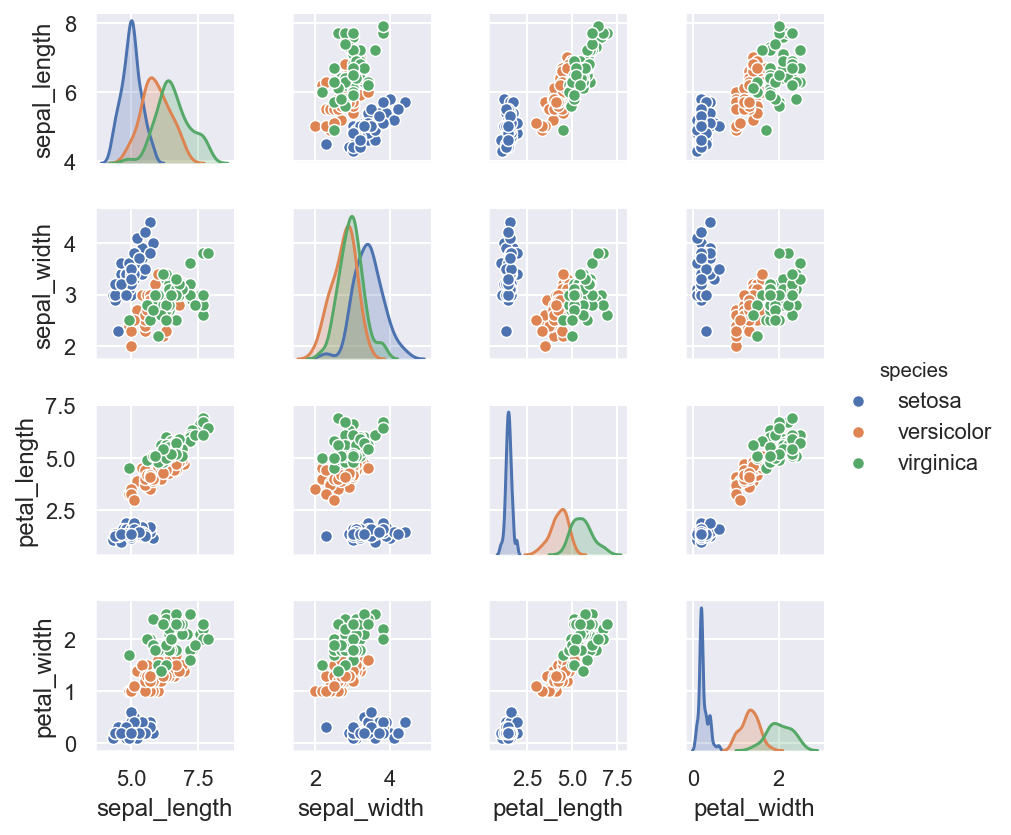

In [41]:
sns.set()
sns.pairplot(iris, hue='species', height=1.5)

In [42]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [43]:
y_iris = iris['species']
y_iris.shape

(150,)

### Scikit-Learn's Estimator API

- **Consistency:** All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- **Inspection:** All specified parameter values are exposed as public attributes.

- **Limited object hierarchy:** Only algorithms are represented by Python classes; datasets are represented in standard formats (Numpy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.

- **Composition:** Many machine learning task can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

- **Sensible defaults:** When models require user-specified parameters, the library defines an appropriate default value.

**Basics of the API**

- Choose a class of model by importing the appropriate estimator class from Scikit-Learn
- Choose model hyperparameters by instantiating this class with desired values.
    - An important point is that a class of model is not the same as an instance of a model.
    - Once we have decided on our model class, we might need to answer one or more questions like the following:
        - would we like to fit for the offset(i.e., intercept)?
        - would we like the model to be normalized?
        - would we like to preprocess our features to add model flexibility?
        - what degree of regularization would we like to use in our model?
        - How many model components would we like to use?
    
- Arrange data into a feature matrix and target vector following the discussion from before.
- Fit the model to your data by calling the **fit()** method of the model instance.
- Apply the model to new data:
    - For **supervised learning**, often we predict labels for unknown data using the **predict()** method.
    - For **unsupervised learning**, we often transform or infer properties of the data using the transform() or predict method.
    
**Note:** In Scikit-Learn, we choose hyperparameters by passing values at model instantiation

#### Supervised learning example: Simple linear regression

In [44]:
# fitting a line to (x,y)
import matplotlib.pyplot as plt
import numpy as np

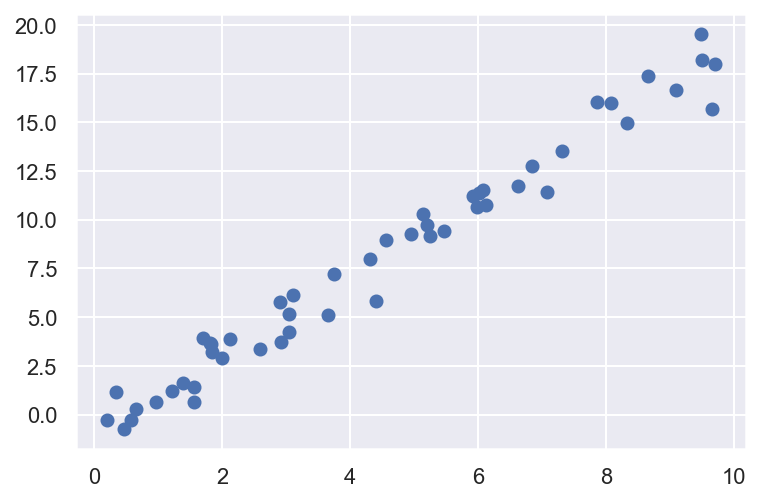

In [45]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)

In [46]:
# 1. Choose a class of model
# importing linear regression class:

from sklearn.linear_model import LinearRegression

# 2. Choose model hyperparameters
# Instantiating the LinearRegression class and specifying we would
# like to fit the intercept

model = LinearRegression(fit_intercept=True)

In [47]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Note:** Keep in mind that when the model is instantiated, the only action is the storing
of these hyperparameter values. In particular, we have not yet applied the
model to any data: the Scikit-Learn API makes very clear the distinction
between choice of model and application of model to data.

In [48]:
# 3. Arrange Data into a features matrix and target vector.
X = x[:, np.newaxis]
X.shape

(50, 1)

In [49]:
# 4. Fit the model to your data.
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Note:** This fit() command causes a number of model-dependent internal computations
to take place, and the results of these computations are stored in modelspecific
attributes that the user can explore.

**Also:** In Scikit-Learn, by convention all
model parameters that were learned during the fit() process have **trailing underscores**; for example, in this linear model, we have the following:

In [50]:
# The slope of simple linear fit to the data, which is close to 
# input slope of 2
model.coef_

array([1.9776566])

In [51]:
# The slope of simple linear intercept to the data, which is close 
# to input intercept of -1
model.intercept_

-0.9033107255311164

Once the model is trained, the main task of supervised machine learning is to
evaluate it based on what it says about new data that was not part of the training
set

In [52]:
# 5. Predict labels for unknown data.
# in Scikit-Learn, we can do this using the predict() method.
xfit = np.linspace(-1, 11)

In [53]:
# we need to coerce these x values into a [n_samples, n_features]
# after which we can feed it to the model
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

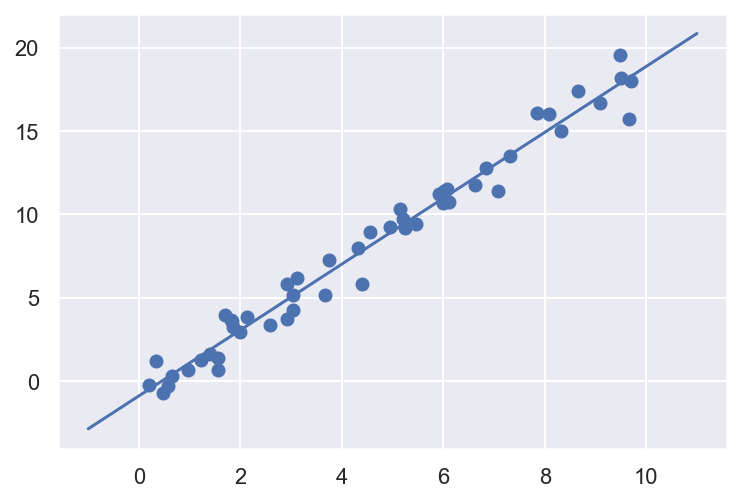

In [54]:
# Finally, Visualizing the results by plotting first the raw data
# then the model fit

plt.scatter(x,y)
plt.plot(xfit, yfit)

#### Supervised Learning example: Iris classification

**Question**: Our question will be this: given a model trained on a portion of the Iris data,
how well can we predict the remaining labels?

we will use an extremely simple generative model known as Gaussian
naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned

Because it is so fast and has no hyperparameters to choose, Gaussian
naive Bayes is often a good model to use as a baseline classification, before you
explore whether improvements can be found through more sophisticated models

We would like to evaluate the model on data it has not seen before, and so we will
split the data into a training set and a testing set. This could be done by hand, but it is
more convenient to use the **train_test_split** utility function:

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [57]:
# 1. choose model class
from sklearn.naive_bayes import GaussianNB

# 2. instantiate model
model = GaussianNB()

# 3. fit the model to data
model.fit(Xtrain, ytrain)

# 4. Predict on new data
y_model = model.predict(Xtest)

# Finally we can use the accuracy_score utility to see the fraction
# of predicted label that match their true value:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

With an accuracy topping 97%, we see that even this very naive classification algorithm
is effective for this particular dataset

#### Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let’s take a look at reducing the
dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data
is four dimensional: there are four features recorded for each sample

The task of dimensionality reduction is to ask whether there is a suitable lowerdimensional
representation that retains the essential features of the data

We will use PCA(Principal Component Analysis) which a fast linear dimensionality reduction technique.

In [58]:
# 1. Choose the model class
from sklearn.decomposition import PCA

# 2. Instantiate them model with hyperparameters
model = PCA(n_components=2)

#3. Fit to data. Notice y is not specified
model.fit(X_iris)

#4. Transform the data to two dimensions
x_2D = model.transform(X_iris)

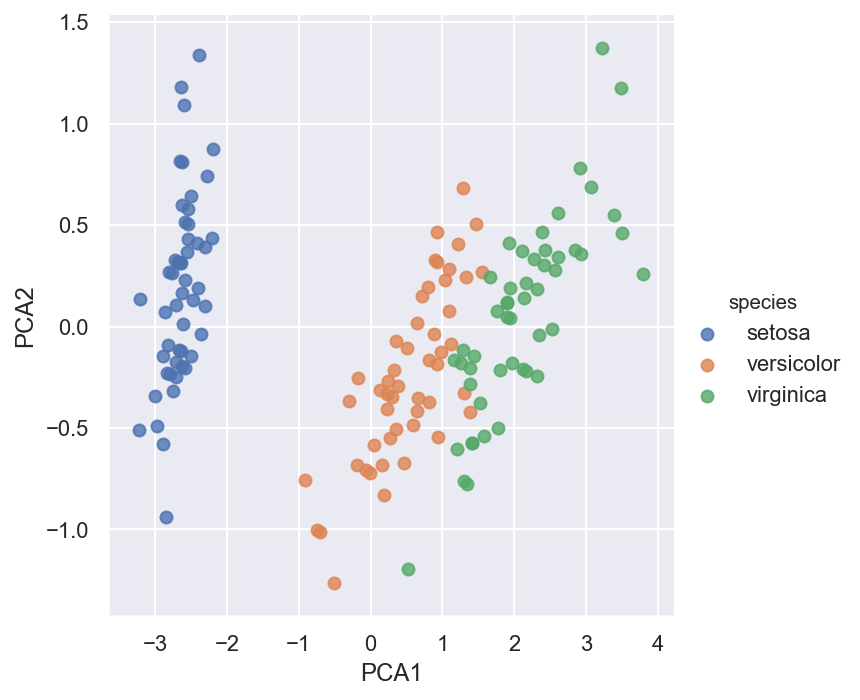

In [59]:
# Lets insert the result into the original Iris DataFrame, 
# use Seaborn's lmplot

iris['PCA1'] = x_2D[:, 0]
iris['PCA2'] = x_2D[:, 1]

sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False)

#### Unsupervised learning: Iris Clustering

A clustering algorithm attempts to find distinct groups of data without reference to any labels. A clustering Method (Gaussian mixture model - GMM), this attempts to model the data as a collection of Gaussian blobs.

In [60]:
# 1. Choose the model class
from sklearn.mixture import GaussianMixture

# 2. Intantiate the model w/ hyperparameters
model = GaussianMixture(n_components=3, covariance_type='full')

# 3. fit to data. Notice y is not specified
model.fit(X_iris)

# 4. Determin cluster labels
y_gmm = model.predict(X_iris)

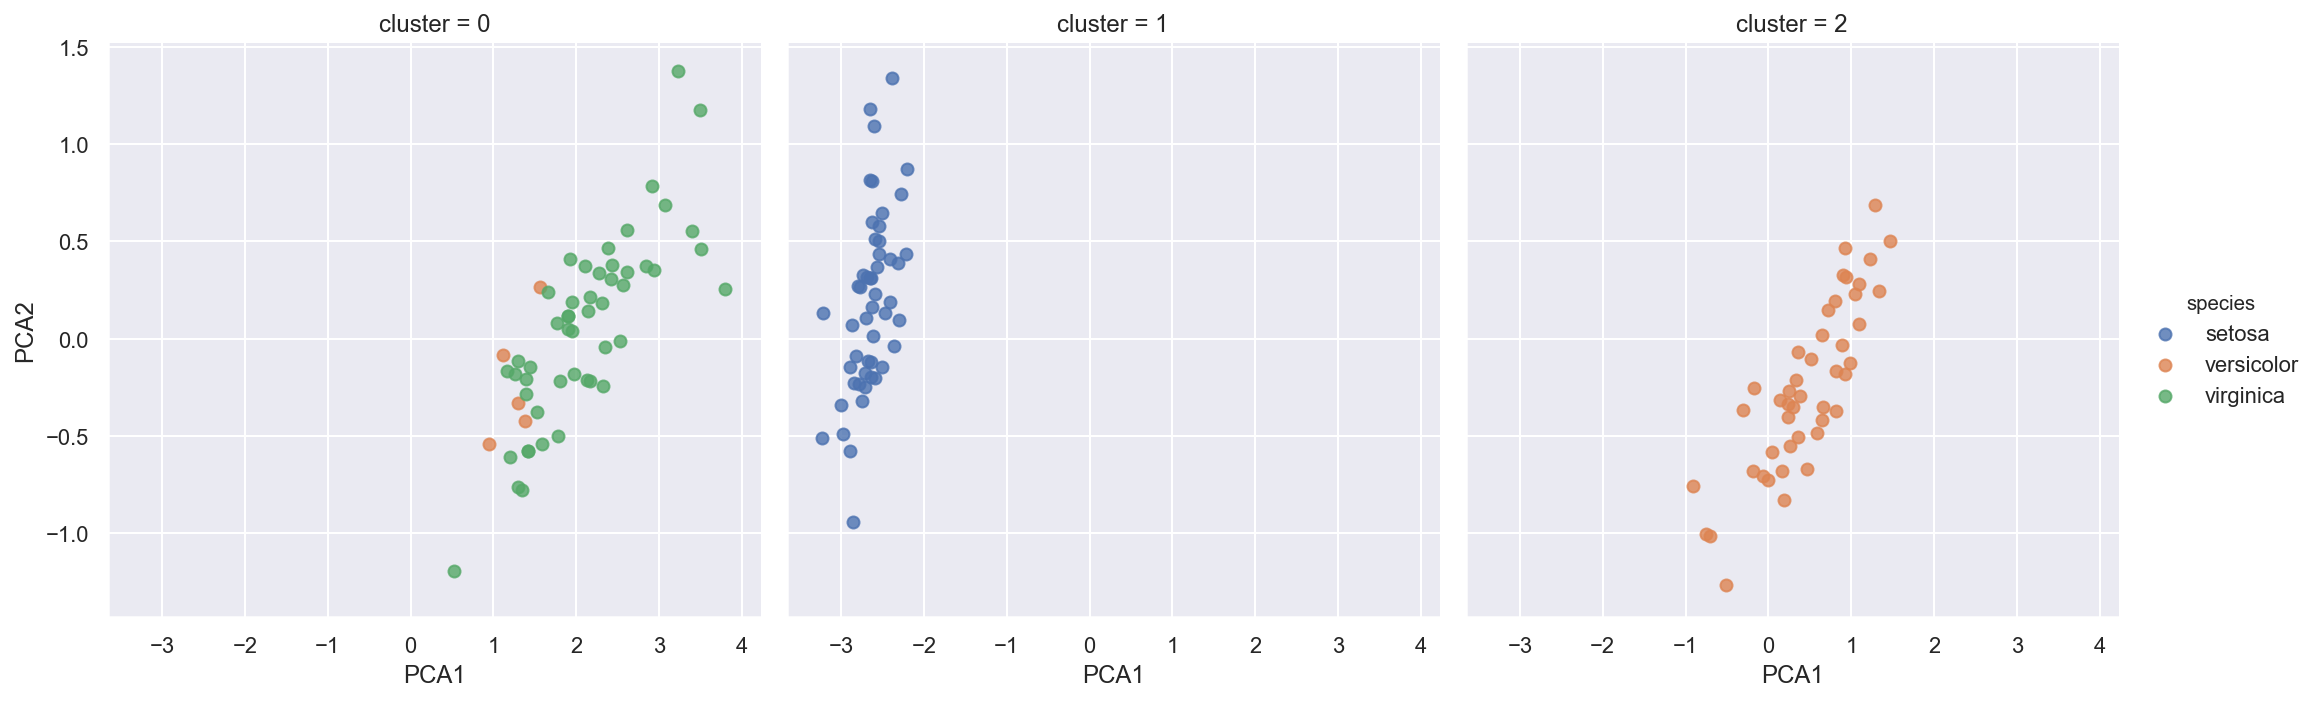

In [61]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

#### Application: Exploring Handwritten Digits
**Loading and visualizing the digits data**

In [62]:
from sklearn.datasets import load_digits

digits = load_digits()

In [63]:
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array:

In [64]:
# Visualizing the first hundred of these
import matplotlib.pyplot as plt

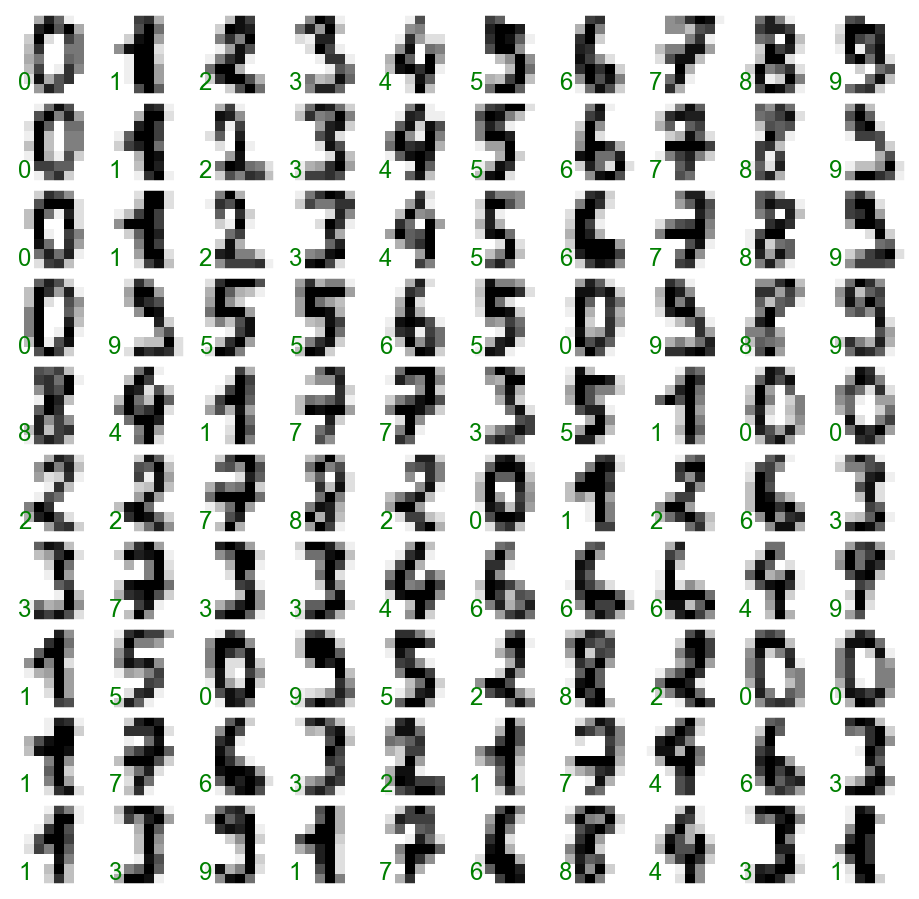

In [65]:
fig, axes = plt.subplots(10,10, figsize=(8,8),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [66]:
X = digits.data
X.shape

(1797, 64)

In [67]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction


In [68]:
# Using Isomap to convert 64-dimensional parameter to 2 dimension
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

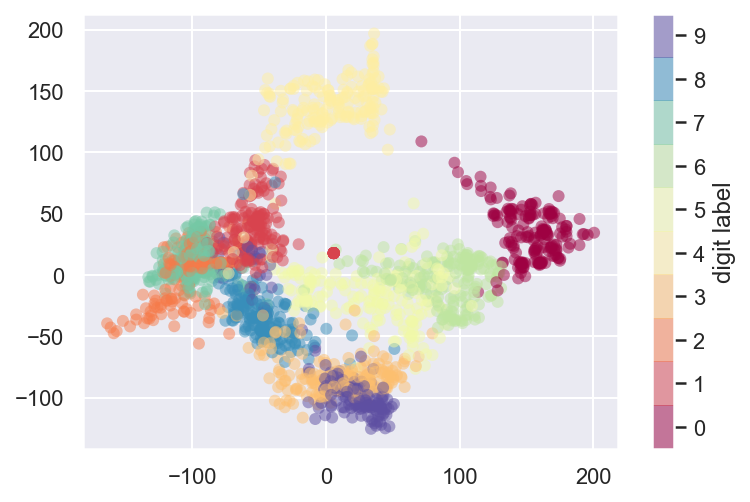

In [69]:
# plotting the data_projected
plt.scatter(data_projected[:,0], data_projected[:, 1], c=digits.target,
           edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

#### Classification on digits

In [70]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=0)

In [71]:
# from sklearn.naive_bayes import GaussianNB

In [72]:
# 1. select a model class

# 2. instantiate the model
model = GaussianNB()

# 3. fit the model to data
model.fit(Xtrain, ytrain)

# 4. Determin cluster model
y_model = model.predict(Xtest)


In [73]:
accuracy_score(ytest, y_model)

0.8333333333333334

Text(89.18, 0.5, 'True Value')

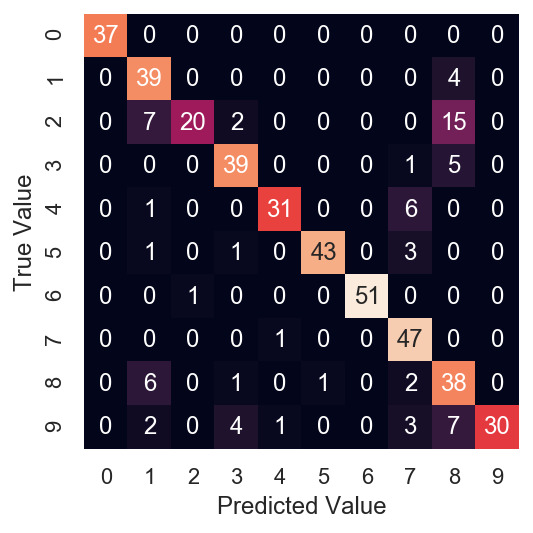

In [74]:
# find out if we have gone wrong
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

\begin{equation*}
\left( \sum_{k=1} )
\end{equation*}